___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


Cost-Sensitive Learning is a type of learning that takes the misclassification costs (and possibly other types of cost) into consideration. 
The goal of this type of learning is to minimize the total cost. There is a tight-coupling between imbalanced classification and cost-sensitive learning. Specifically, an imbalanced learning problem can be addressed using cost-sensitive learning.

## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Exploratory Data Analysis

In [53]:
df = pd.read_csv('creditcard3.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [54]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,...,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.770,0
284803,172787.000,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,...,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.790,0
284804,172788.000,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,...,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.880,0
284805,172788.000,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,...,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.000,0
284806,172792.000,-0.533,-0.190,0.703,-0.506,-0.013,-0.650,1.577,-0.415,0.486,...,0.261,0.643,0.377,0.009,-0.474,-0.818,-0.002,0.014,217.000,0


In [55]:
df.shape

(284807, 31)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,-0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [58]:
df.Amount

0        149.620
1          2.690
2        378.660
3        123.500
4         69.990
           ...  
284802     0.770
284803    24.790
284804    67.880
284805    10.000
284806   217.000
Name: Amount, Length: 284807, dtype: float64

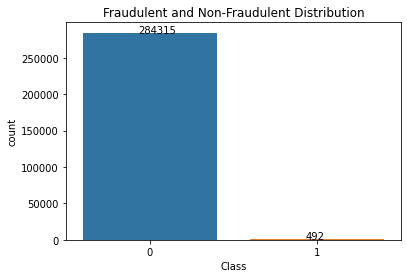

In [59]:
ax = sns.countplot(x='Class', data=df)
ax.set_title('Fraudulent and Non-Fraudulent Distribution')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+50));

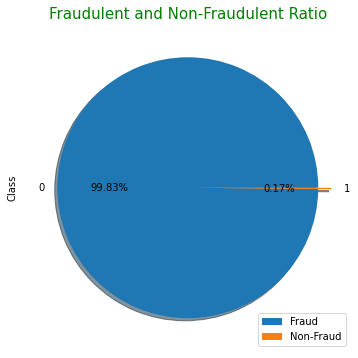

In [60]:
df.Class.value_counts().plot(kind='pie', explode=[0, 0.1],figsize=(6, 6),autopct='%1.2f%%',shadow=True)
plt.title('Fraudulent and Non-Fraudulent Ratio', color='green', fontsize= 15)
plt.legend(['Fraud', 'Non-Fraud'], loc='lower right');

In [61]:
df.Time

0             0.000
1             0.000
2             1.000
3             1.000
4             2.000
            ...    
284802   172786.000
284803   172787.000
284804   172788.000
284805   172788.000
284806   172792.000
Name: Time, Length: 284807, dtype: float64

### Data Cleaning
Check Missing Values and Outliers

In [62]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [63]:
df.isnull().sum().sum()

0

In [64]:
df.duplicated().sum()

1081

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df[['Amount', 'Time', 'Class']].describe()

,Amount,Time,Class
count,283726.000,283726.000,283726.000
mean,88.473,94811.078,0.002
std,250.399,47481.048,0.041
min,0.000,0.000,0.000
25%,5.600,54204.750,0.000
50%,22.000,84692.500,0.000
75%,77.510,139298.000,0.000
max,25691.160,172792.000,1.000


In [67]:
df[df['Amount'] == 0]['Class'].value_counts()

0    1783
1      25
Name: Class, dtype: int64

In [68]:
df[df['Class']==0]['Amount'].describe()[1:]

mean      88.414
std      250.379
min        0.000
25%        5.670
50%       22.000
75%       77.460
max    25691.160
Name: Amount, dtype: float64

In [69]:
df[df['Class']==1]['Amount'].describe()[1:]


mean    123.872
std     260.211
min       0.000
25%       1.000
50%       9.820
75%     105.890
max    2125.870
Name: Amount, dtype: float64

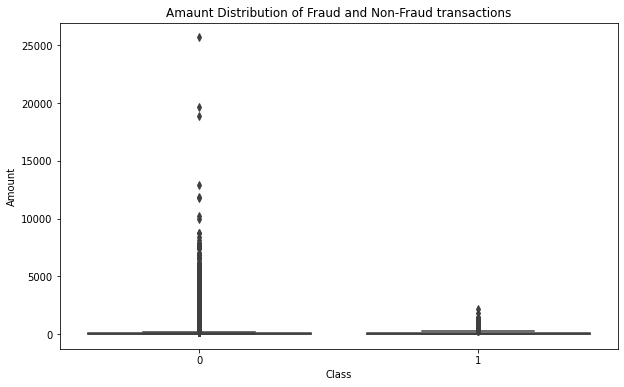

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amaunt Distribution of Fraud and Non-Fraud transactions');

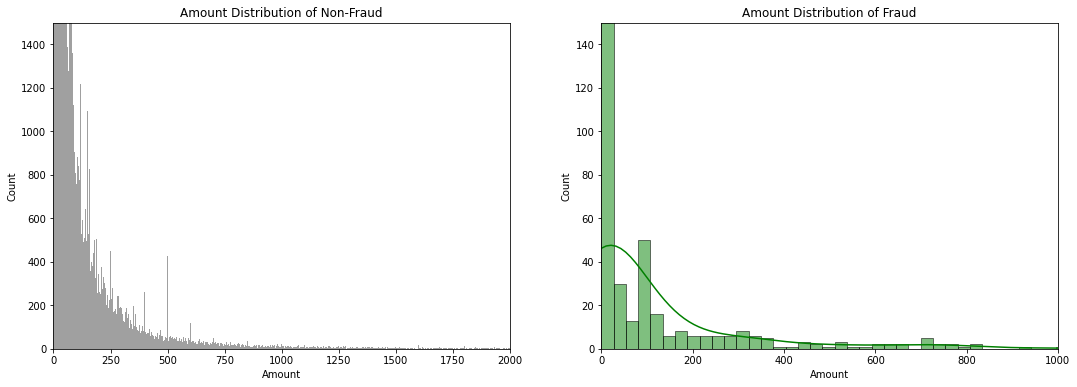

In [71]:
fig, ax = plt.subplots(1, 2, figsize =(18, 6))

sns.histplot(df[df['Class']==0]['Amount'], ax=ax[0], color='Grey')
ax[0].set_xlim([0,2000])
ax[0].set_ylim([0,1500])
ax[0].set_title('Amount Distribution of Non-Fraud')


sns.histplot(df[df['Class']==1]['Amount'], ax=ax[1], kde=True, color= 'Green')
ax[1].set_xlim([0,1000])
ax[1].set_ylim([0,150])
ax[1].set_title('Amount Distribution of Fraud');

In [72]:
df['Time'] = df['Time'].apply(lambda x: (x/3600) )

In [73]:
df['Hour'] = df['Time']%24
df['Hour'] = df['Hour'].apply(lambda x : math.floor(x))

In [74]:
df['Hour'].value_counts(ascending=True)

4      2204
5      2988
2      3308
3      3487
6      4082
1      4208
7      7233
0      7647
8     10232
23    10883
13    15323
22    15378
12    15378
19    15566
9     15767
17    16130
15    16374
16    16396
14    16520
10    16548
20    16705
11    16781
18    16959
21    17629
Name: Hour, dtype: int64

In [75]:
df['Day'] = df['Time']/24
df['Day'] = df['Day'].apply(lambda x:  1 if(x==0) else math.ceil(x))
df['Day'].value_counts()

1    144237
2    139489
Name: Day, dtype: int64

In [76]:
df[df['Class'] == 0]['Time'].describe()[1:]

mean   26.343
std    13.188
min     0.000
25%    15.065
50%    23.531
75%    38.697
max    47.998
Name: Time, dtype: float64

In [77]:
df[df['Class']==1]['Time'].describe()[1:]

mean   22.347
std    13.510
min     0.113
25%    11.445
50%    20.391
75%    35.860
max    47.319
Name: Time, dtype: float64

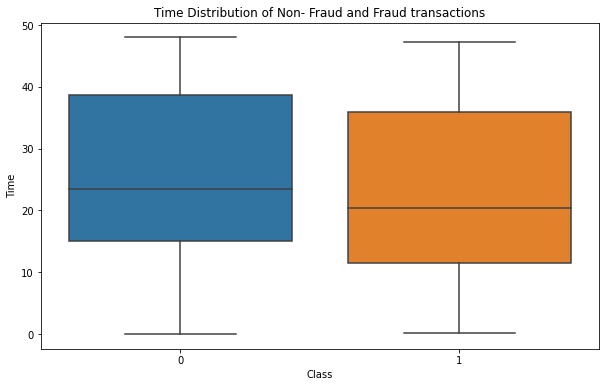

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Time Distribution of Non- Fraud and Fraud transactions');

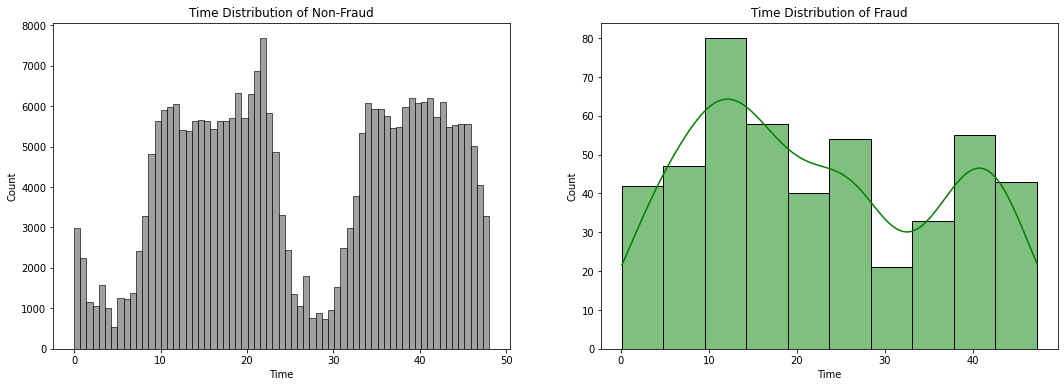

In [79]:
fig, ax = plt.subplots(1, 2, figsize =(18, 6))

sns.histplot(df[df['Class']==0]['Time'], ax=ax[0], color='Grey')
#ax[0].set_xlim([0,2000])
#ax[0].set_ylim([0,1500])
ax[0].set_title('Time Distribution of Non-Fraud')


sns.histplot(df[df['Class']==1]['Time'], ax=ax[1], kde=True, color= 'Green')
#ax[1].set_xlim([0,1000])
#ax[1].set_ylim([0,150])
ax[1].set_title('Time Distribution of Fraud');

Text(0.5, 1.0, 'Distribution of Fraud Transactions')

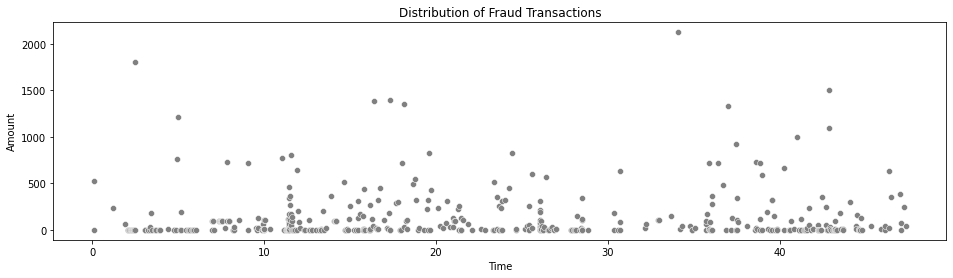

In [80]:
fig, ax = plt.subplots(figsize=(16,4))
sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], color='Grey')
ax.set_title("Distribution of Fraud Transactions")

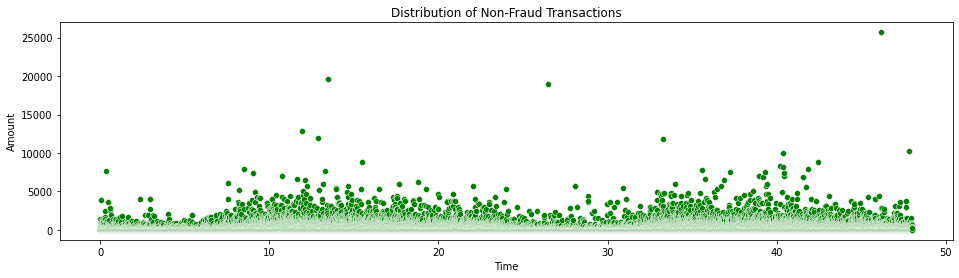

In [81]:
fig, ax = plt.subplots(figsize=(16,4))
sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], color='Green')
ax.set_title("Distribution of Non-Fraud Transactions");


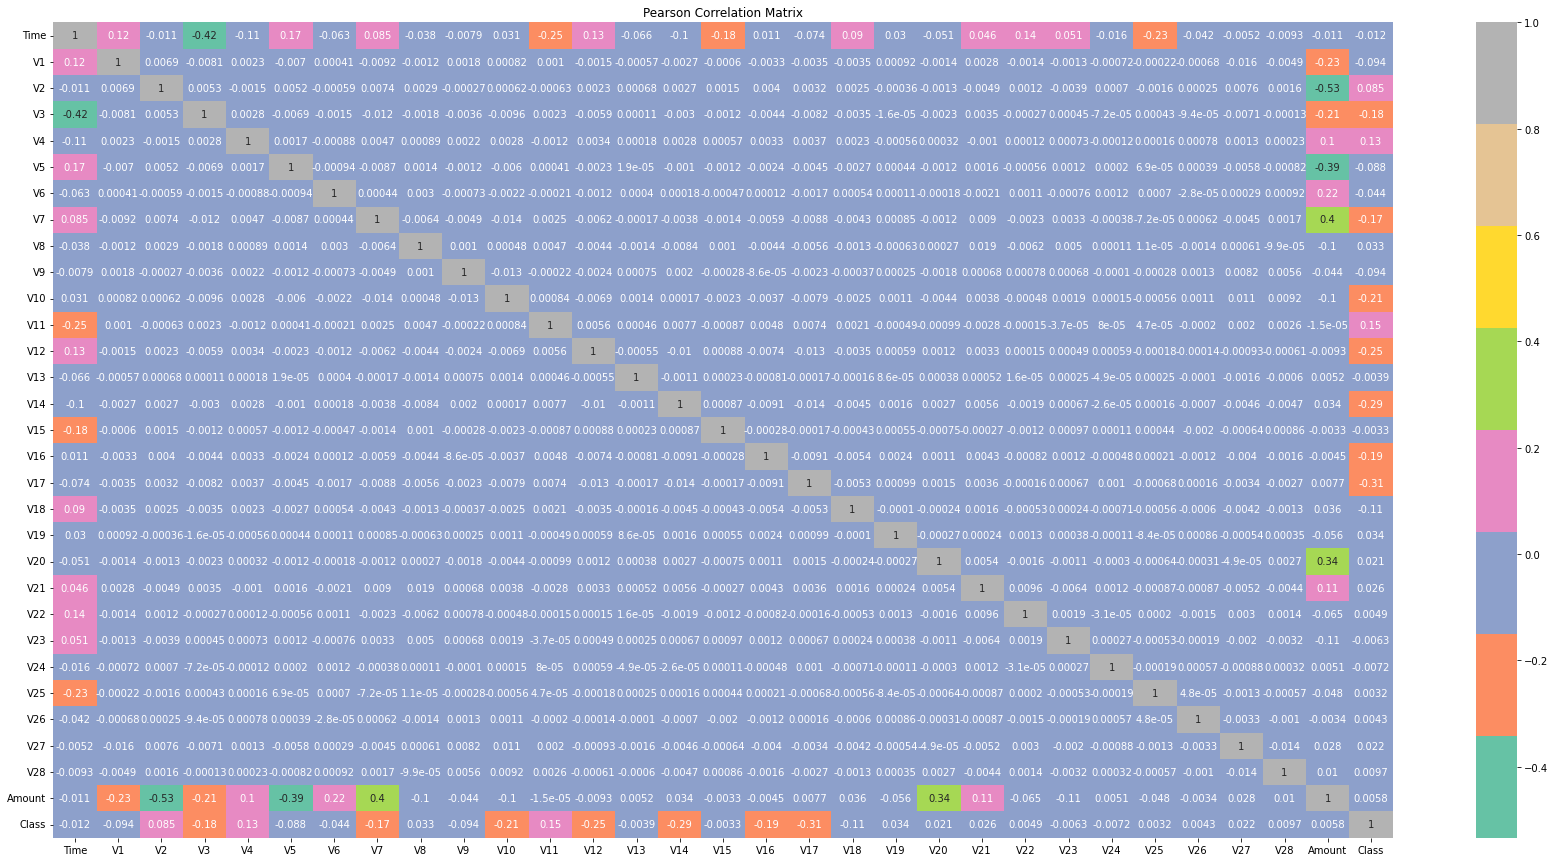

In [135]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='Set2')
plt.title('Pearson Correlation Matrix');

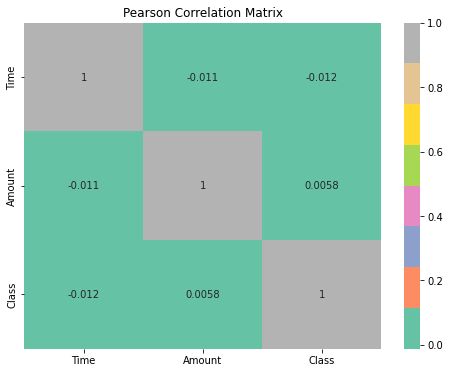

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df[['Time', 'Amount', 'Class']].corr(), annot=True, cmap='Set2')
plt.title('Pearson Correlation Matrix');

In [84]:
df[df['Class']==1]['Day'].value_counts(), df[df['Class']==1]['Day'].value_counts(normalize=True)

(1    272
 2    201
 Name: Day, dtype: int64,
 1   0.575
 2   0.425
 Name: Day, dtype: float64)

In [85]:
df[df['Class']==0]['Day'].value_counts(), df[df['Class']==0]['Day'].value_counts(normalize=True)

(1    143965
 2    139288
 Name: Day, dtype: int64,
 1   0.508
 2   0.492
 Name: Day, dtype: float64)

/Users/rabiaaras/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rabiaaras/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


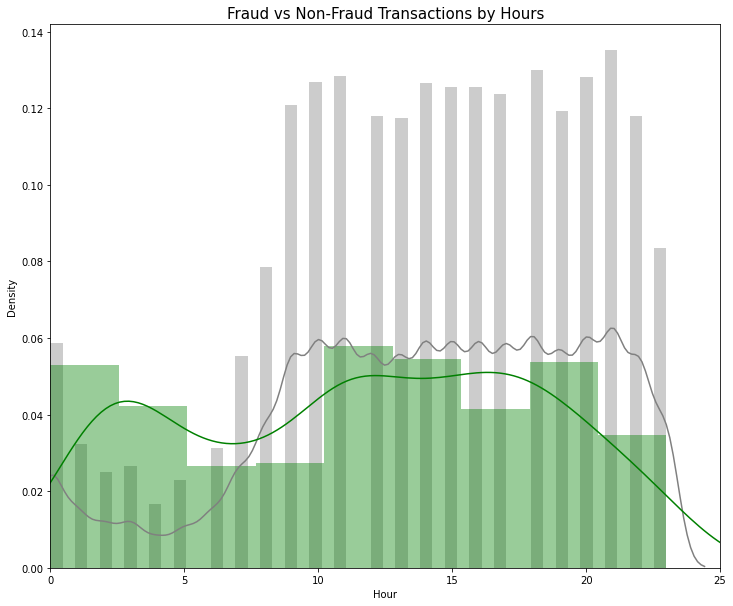

(None,)

In [86]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['Class'] == 0]["Hour"], color='grey') # Genuine - green
sns.distplot(df[df['Class'] == 1]["Hour"], color='green') # Fraudulent - Red

plt.title('Fraud vs Non-Fraud Transactions by Hours', fontsize=15)
plt.xlim([0,25])
plt.show(),

In [87]:
df.reset_index(inplace=True, drop=True)

In [88]:
df.index

RangeIndex(start=0, stop=283726, step=1)

In [89]:
#df.drop(columns=['Day', 'Hour'], axis=1, inplace=True)##i drop the time column

In [ ]:
df.drop(columns=['Day', 'Hour', 'Time'], axis=1, inplace=True)

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [90]:
df1 = df.copy()
X = df1.drop(['Class'], axis=1)
y = df1['Class']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=101)

#### Scaling

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [93]:
scaler = StandardScaler()

In [ ]:
#check the skewness for amount features

In [94]:
#X_train[['Amount', 'Time']]= scaler.fit_transform(X_train[['Amount', 'Time']])
#X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

In [ ]:
X_train['Amount']= scaler.fit_transform(X_train['Amount' ])
X_test['Amount'] = scaler.transform(X_test['Amount'])

In [95]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
188942,0.709,-1.902,-2.534,0.945,-0.929,-0.704,-0.849,-1.088,0.700,-0.042,...,0.737,0.290,-0.199,0.456,-0.064,-0.117,-0.374,-0.132,-0.344,0.457
29942,-1.245,1.294,0.146,0.278,0.516,-0.350,-0.738,-0.033,-0.103,0.269,...,-0.157,-0.304,-0.939,0.090,-0.154,0.242,0.130,-0.038,0.011,-0.346
273424,1.499,2.075,0.034,-1.962,0.331,0.409,-1.561,0.786,-0.606,0.081,...,-0.139,0.115,0.513,-0.066,0.086,0.373,0.824,-0.123,-0.081,-0.234
54227,-1.019,1.113,-0.429,1.109,0.280,-1.139,-0.338,-0.500,-0.030,1.012,...,0.107,-0.188,-0.338,0.020,0.509,0.159,0.932,-0.035,0.026,-0.115
86642,-0.703,1.169,-0.139,0.594,0.855,-0.572,-0.132,-0.299,0.105,0.787,...,-0.210,-0.090,-0.041,-0.031,0.116,0.441,0.443,-0.005,0.008,-0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93225,-0.639,-4.479,-3.455,-0.223,3.955,-5.788,5.406,5.130,0.086,-1.382,...,0.164,0.356,1.175,0.375,-0.475,-0.347,0.510,1.088,-1.071,6.568
62505,-0.936,-0.239,0.477,1.301,0.004,-0.189,1.902,-1.676,-2.113,0.074,...,0.628,-1.376,0.187,-0.229,-1.319,0.905,0.488,0.061,0.187,-0.317
146670,-0.139,2.060,-0.147,-1.089,0.432,-0.267,-1.251,0.095,-0.260,0.742,...,-0.310,-0.304,-0.807,0.357,0.010,-0.345,0.200,-0.079,-0.063,-0.346
72020,-0.847,1.190,-0.927,-0.507,-0.710,-0.613,-0.768,-0.065,-0.285,-0.852,...,0.361,0.187,0.080,-0.343,-0.438,0.698,-0.108,-0.053,0.024,0.322


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, plot_precision_recall_curve

***ii. Model Training***

In [97]:
log_model = LogisticRegression(random_state=101, class_weight='balanced')
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=101)

***iii. Prediction and Model Evaluating***

In [98]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [99]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[55291  1360]
 [   11    84]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.88      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746


Train_Set
[[221381   5221]
 [    28    350]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    226602
           1       0.06      0.93      0.12       378

    accuracy                           0.98    226980
   macro avg       0.53      0.95      0.55    226980
weighted avg       1.00      0.98      0.99    226980




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


/Users/rabiaaras/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


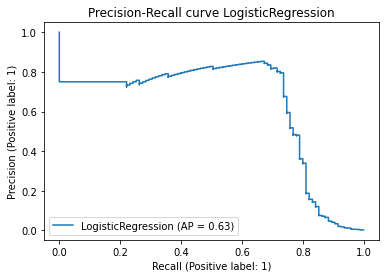

In [100]:
plot_precision_recall_curve(log_model,X_test, y_test)
plt.title('Precision-Recall curve LogisticRegression')
plt.show()

In [101]:
#y_pred_proba = log_model.predict_proba(X_train)

#precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])


In [102]:
len(precisions)

NameError: name 'precisions' is not defined

In [ ]:
len(thresholds)

In [ ]:
len(recalls)

In [ ]:
np.linspace(0.1, 1, num=10)

In [ ]:
thresholds = []

for i in np.linspace(0.1, 1, num=10):
    threshold.append(i)

In [103]:
y_pred = log_model.predict(X_test)
log_model_f1 = f1_score(y_test, y_pred)
log_model_recall = recall_score(y_test, y_pred)
log_model_precision = precision_score(y_test, y_pred)

***v. Apply StratifiedKFold***

In [104]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [105]:
from sklearn.metrics import make_scorer

f1_1 = make_scorer(f1_score, pos_label=1)
precision_1 = make_scorer(precision_score, pos_label=1)
recall_1 = make_scorer(recall_score, pos_label= 1)

scoring = {"precision_1":precision_1, "recall_1":recall_1, "f1_1":f1_1}

In [106]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
scores = cross_validate(log_model, X_train, y_train, scoring=scoring, cv=skf)

In [136]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean[:2]

TypeError: 'method' object is not subscriptable

/Users/rabiaaras/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


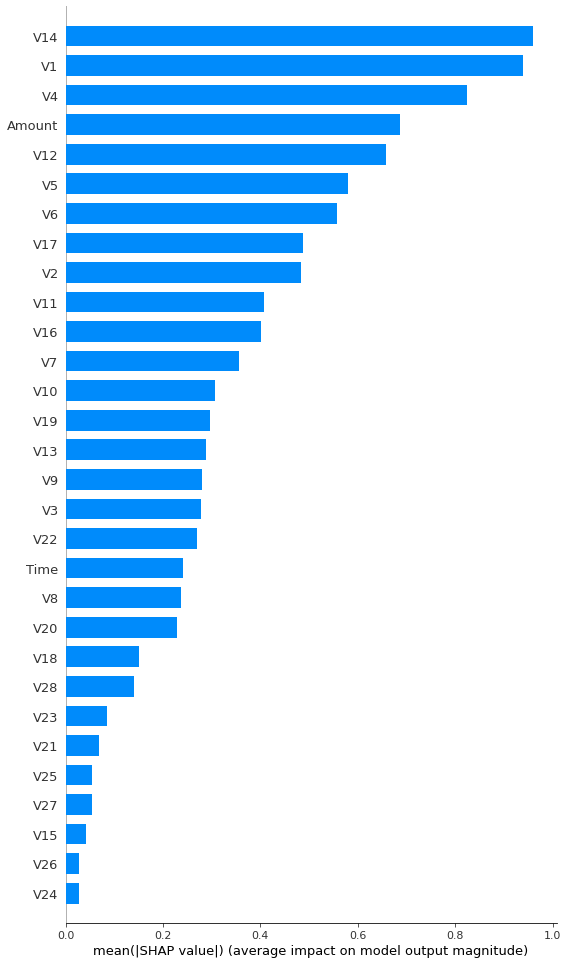

In [108]:
import shap

explainer = shap.Explainer(log_model, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=300,feature_names = X.columns, plot_type="bar")

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [124]:
from imblearn.over_sampling import SMOTE

In [137]:
over = SMOTE(sampling_strategy={1: 550})
X_over, y_over = over.fit_resample(X_train, y_train)

In [138]:
y_over.value_counts()

0    226602
1       550
Name: Class, dtype: int64

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

***ii. Model Training***

In [142]:
smote_model =  LogisticRegression(random_state=101)
smote_model.fit(X_over, y_over)

LogisticRegression(random_state=101)

***iii. Prediction and Model Evaluating***

In [143]:
eval_metric(smote_model, X_over, y_over, X_test, y_test)

Test_Set
[[56637    14]
 [   35    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.81      0.63      0.71        95

    accuracy                           1.00     56746
   macro avg       0.91      0.82      0.85     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226564     38]
 [   192    358]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.90      0.65      0.76       550

    accuracy                           1.00    227152
   macro avg       0.95      0.83      0.88    227152
weighted avg       1.00      1.00      1.00    227152



***iv.  Plot Precision and Recall Curve***


Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.


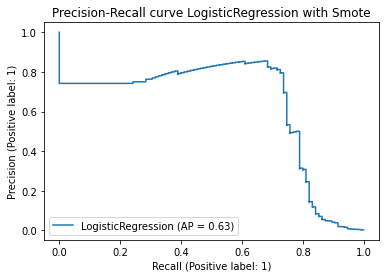

In [141]:
plot_precision_recall_curve(smote_model,X_test, y_test)
plt.title('Precision-Recall curve LogisticRegression with Smote')
plt.show()

In [144]:
y_pred = smote_model.predict(X_test)
smote_model_f1 = f1_score(y_test, y_pred)
smote_model_recall = recall_score(y_test, y_pred)
smote_model_precision = precision_score(y_test, y_pred)

***v. Apply StratifiedKFold***

In [145]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
scores = cross_validate(smote_model, X_over, y_over, scoring = scoring, cv = skf)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_1   0.896
test_recall_1      0.649
test_f1_1          0.752
dtype: float64

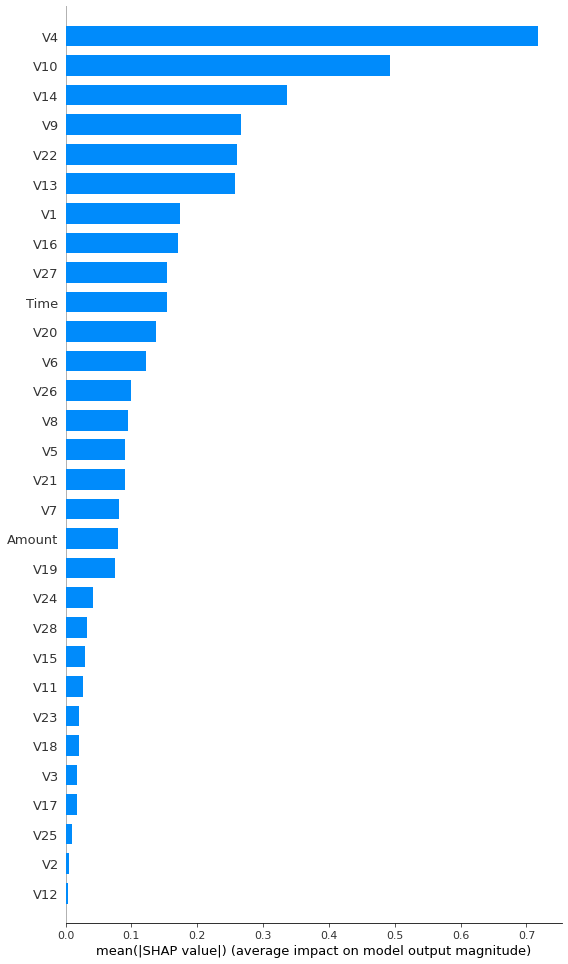

In [146]:
import shap

explainer = shap.Explainer(smote_model, X_over)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=300,feature_names = X.columns, plot_type="bar")

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [147]:
randomforest_model= RandomForestClassifier(random_state=101, max_depth=3, n_jobs=-1)

In [148]:
randomforest_model.fit(X_over, y_over)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=101)

***ii. Prediction and Model Evaluating***

In [149]:
eval_metric(randomforest_model, X_over, y_over, X_test, y_test)

Test_Set
[[56640    11]
 [   42    53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.56      0.67        95

    accuracy                           1.00     56746
   macro avg       0.91      0.78      0.83     56746
weighted avg       1.00      1.00      1.00     56746


Train_Set
[[226566     36]
 [   206    344]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.91      0.63      0.74       550

    accuracy                           1.00    227152
   macro avg       0.95      0.81      0.87    227152
weighted avg       1.00      1.00      1.00    227152



***iii. Plot Precision and Recall Curve***


Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.


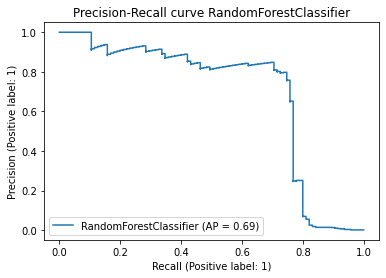

In [150]:
plot_precision_recall_curve(randomforest_model,X_test, y_test)
plt.title('Precision-Recall curve RandomForestClassifier')
plt.show()


In [151]:
y_pred = randomforest_model.predict(X_test)
randomforest_f1 = f1_score(y_test, y_pred)
randomforest_recall = recall_score(y_test, y_pred)
randomforest_precision = precision_score(y_test, y_pred)

In [152]:
randomforest_feature_imp = pd.DataFrame(index = X.columns, data = randomforest_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
randomforest_feature_imp[:10]

,Feature Importance
V17,0.177
V12,0.168
V14,0.140
V16,0.118
V11,0.105
V10,0.094
V18,0.048
V9,0.042
V4,0.034
V7,0.022


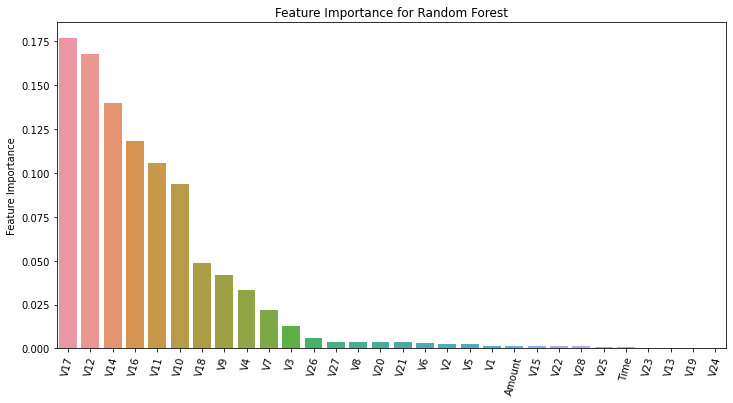

In [153]:
plt.figure(figsize = (12,6))
ax = sns.barplot(y=randomforest_feature_imp["Feature Importance"], x=randomforest_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.xticks(rotation = 75);

 98%|===================| 111711/113492 [00:50<00:00]        

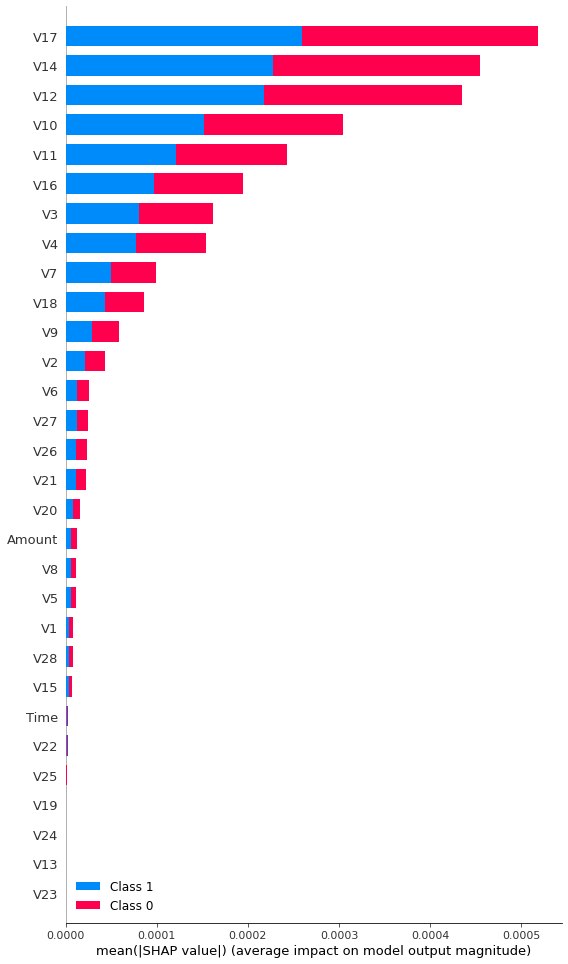

In [155]:
explainer = shap.Explainer(randomforest_model, X_over)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display=300,feature_names = X.columns, plot_type="bar")

***iv. Apply StratifiedKFold***

In [ ]:
skf =  StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
scores = cross_validate(randomforest_model, X_train, y_train, scoring = scoring, cv = skf)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from livelossplot import PlotLossesKerasTF 
from sklearn.metrics import precision_recall_curve

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
from sklearn.metrics import average_precision_score, plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

***ii. Define Model***

***iii. Compile Model***

In [161]:

model = Sequential()

model.add(Dense(64, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.3))
BatchNormalization()
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
#model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer= opt, loss='binary_crossentropy', metrics= ['Recall'])

In [162]:
early_stop = EarlyStopping(monitor = "val_recall", mode = 'auto', 
                           verbose=1, patience = 3, restore_best_weights=True)

In [163]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5008340614822464, 1: 300.23809523809524}

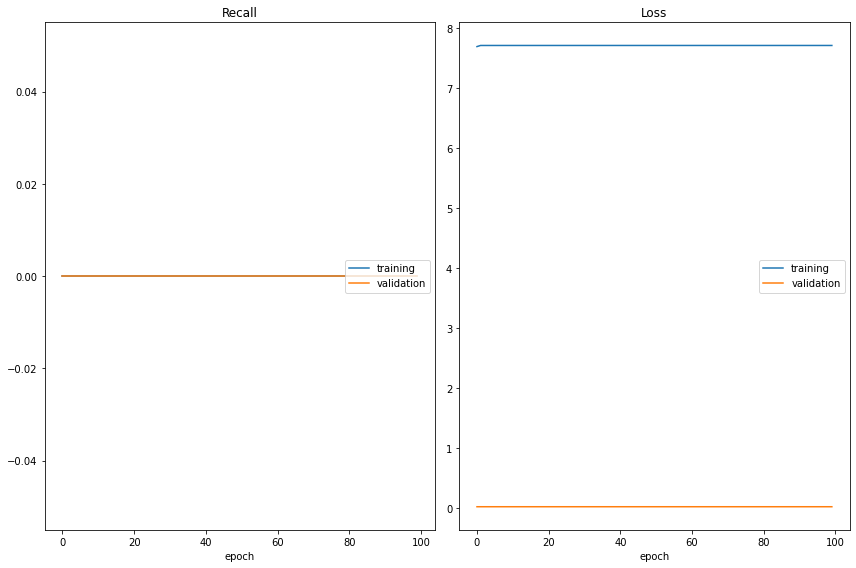

Recall
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    7.694, max:    7.712, cur:    7.712)
	validation       	 (min:    0.026, max:    0.026, cur:    0.026)
226980/226980 [==============================] - 11s 46us/sample - loss: 7.7125 - Recall: 0.0000e+00 - val_loss: 0.0258 - val_Recall: 0.0000e+00


In [164]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          batch_size=80,
          epochs=100,
          verbose=1,
          callbacks=[early_stop,PlotLossesKerasTF()],
          class_weight= class_weights)

In [119]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


***v. Prediction and Model Evaluating***

In [120]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,Recall,val_loss,val_Recall
0,0.326,0.865,0.319,0.958
1,0.237,0.923,0.132,0.926
2,0.266,0.942,0.090,0.863
3,0.245,0.958,0.149,0.926
4,0.197,0.958,0.121,0.905
...,...,...,...,...
95,1.664,0.791,0.011,0.747
96,1.623,0.796,0.011,0.747
97,1.603,0.799,0.011,0.747
98,1.600,0.799,0.011,0.747


<AxesSubplot:>

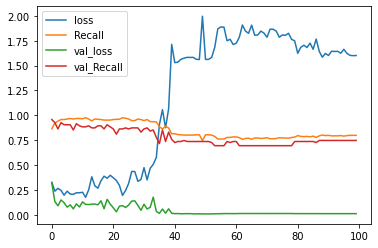

In [121]:
loss_df.plot()

In [122]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56634    17]
 [   24    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.81      0.75      0.78        95

    accuracy                           1.00     56746
   macro avg       0.90      0.87      0.89     56746
weighted avg       1.00      1.00      1.00     56746



In [123]:
y_pred = model.predict(X_test)
model_f1 = f1_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)

***vi. Plot Precision and Recall Curve***

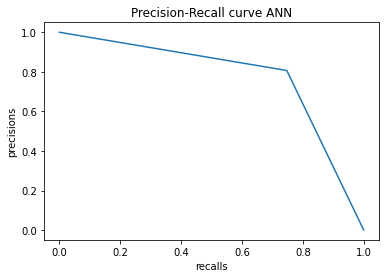

In [156]:
y_pred_proba = model.predict_proba(X_test)#[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve ANN')
plt.show()


In [157]:
average_precision_score(y_test, y_pred_proba) 

0.6034133679215549

# COMPARING ALL OF THE MODEL

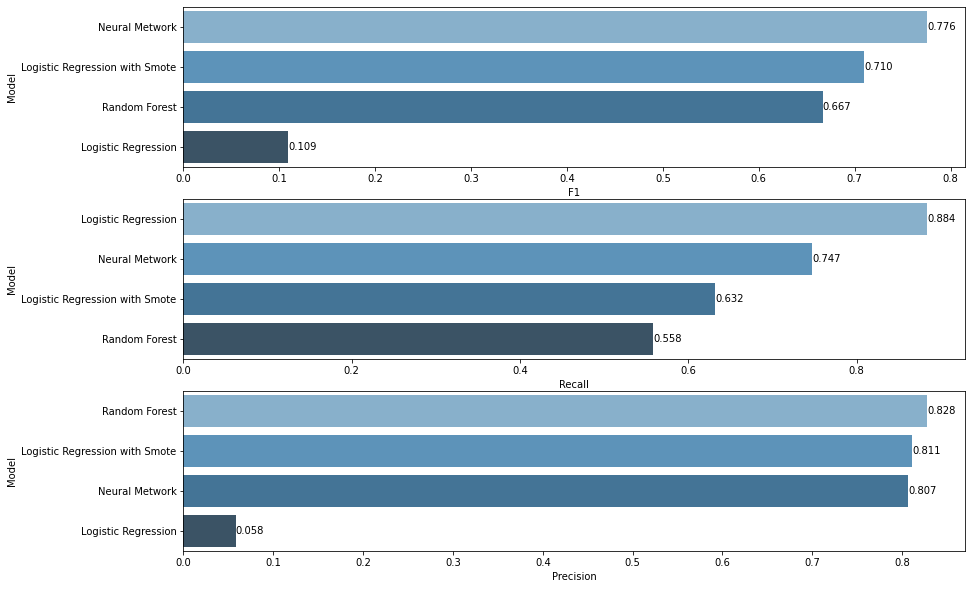

In [160]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Logistic Regression with Smote", "Random Forest", "Neural Metwork"],
                        "F1": [log_model_f1 , smote_model_f1, randomforest_f1, model_f1],
                        "Recall": [ log_model_recall,smote_model_recall,randomforest_recall, model_recall],
                        "Precision": [log_model_precision, smote_model_precision, randomforest_precision, model_precision]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

In [ ]:
X.columns

In [ ]:
NEW_X = X.drop(columns=['Time', 'V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=101)

In [ ]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)

In [ ]:
randomforest_model= RandomForestClassifier(random_state=101, class_weight='balanced', max_depth=3, n_jobs=-1)
randomforest_model.fit(X_over, y_over)

In [ ]:
import pickle
randomforest_model1 = pickle.dump(randomforest_model, open('randomforest_model', 'wb'))

### Save and Export the Model as .pkl


### Save and Export Variables as .pkl

In [ ]:
explainer = shap.TreeExplainer(smote_rf_model["rf"])
shap_values = explainer.shap_values(X_test,approximate=True)
shap.summary_plot(shap_values, X_test, plot_type="bar")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___